In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Importing Dataset

In [0]:
fb_train = pd.read_csv('train.csv')

In [0]:
fb_train

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927
...,...,...
9437514,1862219,1187308
9437515,1862219,563943
9437516,1862219,1044046
9437517,1862219,1022613


So from the data, we can say that it is a directed graph with two nodes: Source Node and Destination Node. So lets visualise the data with NetworkX Python Lbrary.

**Making csv of edgelist with no header and index**

---



In [0]:
fb_train.to_csv('train_noheader.csv', index=False, header=False)

In [0]:
f = nx.read_edgelist('train_noheader.csv', delimiter=',', nodetype=int, create_using=nx.DiGraph)

This is a Directed Graph and nx() is by default undirected graph. So we change create_using to nx.DiGraph.

In [0]:
#Information of Graph
print(nx.info(f))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


**Inference of The Network**

The total number of nodes in this graph are 186220 and the total number of edges are 9437519. Here we are given only edges /link not nodes.

So, the total number of possible edges/connections could be the all the combinations of 186220 i.e 186220 C 2. 

And we are given only 9437519. Rest 186220 C2 - 9437519 edges/connection does not exist in the given network.


* Incoming Nodes = In Degree 

* Outgoing Nodes = Out Degree


**What Do We Predict?**

Missing Links.

For our ease we are gonna indicate '1' for the links present between two nodes and'-1' for all the missing links. However we are given with all the present links in our goven data, i.e 9437519. So remaining 186220C2 - 9437519 are missing links. But we can not take all the remaining missing links combination because it will give us a biased data. So we will be randomly sampling 9437519 from it to get ballanced data.

So our final data will be 9437519 x 2 = 18875038.
And our final data will have 9437519 rows with 1 and 9437519 rows with -1.

**Reading 50 rows**

---
Since it will be a mess to see a graph of network with 9437519 rows, we will take only 50 rows and see a subgraph of it.

In [0]:
df = fb_train.iloc[:50]
df.head(3)

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226


#**Visualisation**

We can do this either with Dataframe or with Graph

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


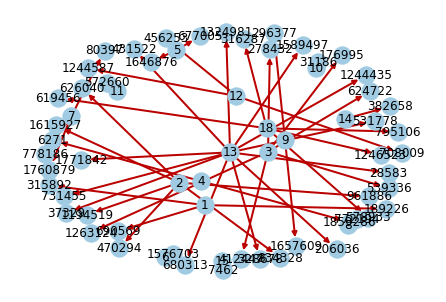

In [0]:
#Visualising with Dataframe using nx.from_pandas_edgelist
g = nx.from_pandas_edgelist(df, source='source_node', target='destination_node', create_using=nx.DiGraph())
pos=nx.spring_layout(g)
nx.draw(g,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=True)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


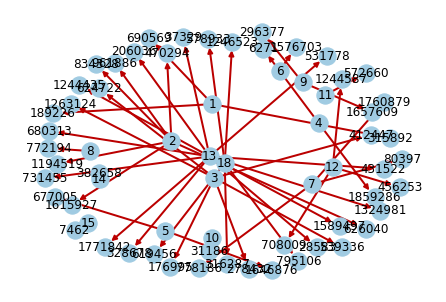

In [0]:
#Visualisng with Graph using nx.read_edgelist
df.to_csv('50row_noheader.csv', index=False, header=False)
l = nx.read_edgelist('50row_noheader.csv',delimiter=',',nodetype=int, create_using=nx.DiGraph())
pos = nx.spring_layout(l)
nx.draw(l,pos, with_labels=True,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues)
print(nx.info(l))

From the above graph we can see that how all the source nodes are placed toward the centre of the network and all tha destination nodes are placed outward.

**Distribution of Number of Followers of each nodes in the trainig set**


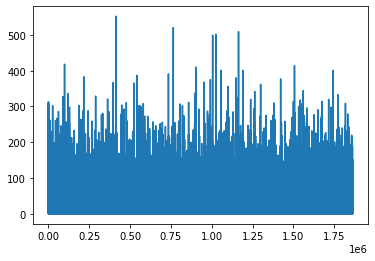

In [0]:
#Number of followers
followers = dict(f.in_degree)
lists_followers = sorted(followers.items())
x, y = zip(*lists_followers)
plt.plot(x,y)
plt.show()
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356

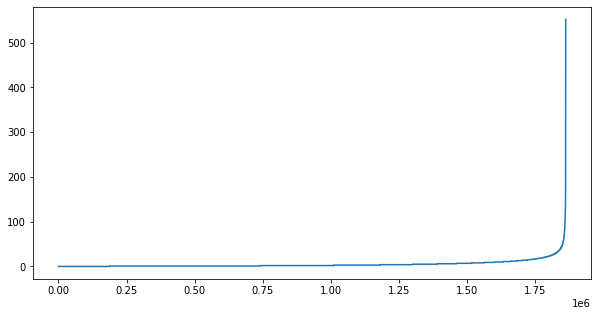

In [0]:
followers1 = list(dict(f.in_degree).values())
followers1.sort()
plt.figure(figsize=(10,5))
plt.plot(followers1)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f00140c83c8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f00140c8dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f001b479898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f001b479518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00140c86d8>,
  <matplotlib.lines.Line2D at 0x7f00140c8a58>]}

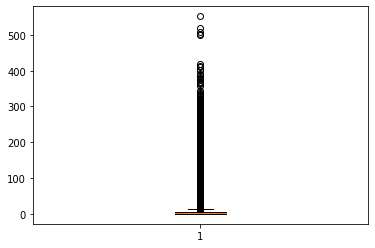

In [0]:
plt.boxplot(followers1)

In [0]:
#Percentile outlier of Outdegree(90-100)
for i in range(0,11):
  print((90+i), 'Value of percentile is', np.percentile(followers1,90+i))

print('='*35)
print('*'*35)
print('='*35)

#Percentile outlier of Indegree(99-100)
for i in range(10,110,10):
  print(99+(i/100), 'Value of percentile is', np.percentile(followers1,99+(i/100)))

90 Value of percentile is 12.0
91 Value of percentile is 13.0
92 Value of percentile is 14.0
93 Value of percentile is 15.0
94 Value of percentile is 17.0
95 Value of percentile is 19.0
96 Value of percentile is 21.0
97 Value of percentile is 24.0
98 Value of percentile is 29.0
99 Value of percentile is 40.0
100 Value of percentile is 552.0
***********************************
99.1 Value of percentile is 42.0
99.2 Value of percentile is 44.0
99.3 Value of percentile is 47.0
99.4 Value of percentile is 50.0
99.5 Value of percentile is 55.0
99.6 Value of percentile is 61.0
99.7 Value of percentile is 70.0
99.8 Value of percentile is 84.0
99.9 Value of percentile is 112.0
100.0 Value of percentile is 552.0


**Observations:**
* The number of followers for most users fall in the range of 40–50.
* The maximum number of followers by a user is 552.


**Distribution of Number of Followee of each nodes in the trainig set**


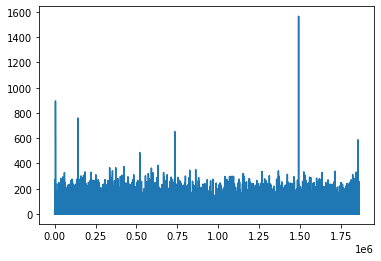

In [0]:
#Number of followee
following = dict(f.out_degree)
lists_following = sorted(following.items())
x, y = zip(*lists_following)
plt.plot(x,y)
plt.show()

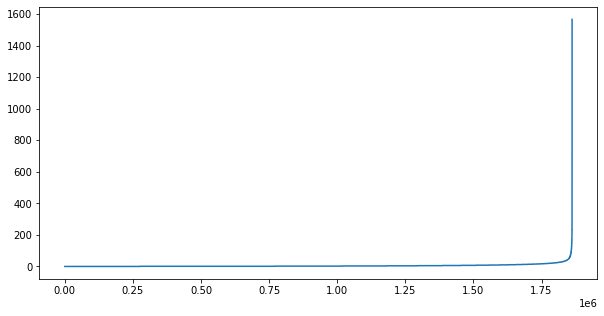

In [0]:
following1 = list(dict(f.out_degree).values())
following1.sort()
plt.figure(figsize=(10,5))
plt.plot(following1)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f000ce88f28>],
 'caps': [<matplotlib.lines.Line2D at 0x7f000ce13978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f000ce1f438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f000ce1f0b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f000ce13278>,
  <matplotlib.lines.Line2D at 0x7f000ce135f8>]}

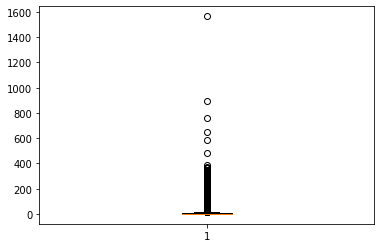

In [0]:
plt.boxplot(following1)

In [0]:
#Percentile outlier of Indegree(90-100)
for i in range(0,11):
  print((90+i), 'Value of percentile is', np.percentile(following1,90+i))

print('='*35)
print('*'*35)
print('='*35)

#Percentile outlier of Indegree(99-100)
for i in range(10,110,10):
  print(99+(i/100), 'Value of percentile is', np.percentile(following1,99+(i/100)))

90 Value of percentile is 12.0
91 Value of percentile is 13.0
92 Value of percentile is 14.0
93 Value of percentile is 15.0
94 Value of percentile is 17.0
95 Value of percentile is 19.0
96 Value of percentile is 21.0
97 Value of percentile is 24.0
98 Value of percentile is 29.0
99 Value of percentile is 40.0
100 Value of percentile is 1566.0
***********************************
99.1 Value of percentile is 42.0
99.2 Value of percentile is 45.0
99.3 Value of percentile is 48.0
99.4 Value of percentile is 52.0
99.5 Value of percentile is 56.0
99.6 Value of percentile is 63.0
99.7 Value of percentile is 73.0
99.8 Value of percentile is 90.0
99.9 Value of percentile is 123.0
100.0 Value of percentile is 1566.0


**Observations:**
* Most of the users in this network have followees in the range of 40 to 50.
* The maximum number of followees by a user is 1556.

**Following Each Other:**

Number or people followed by the user and are followed back in return. 

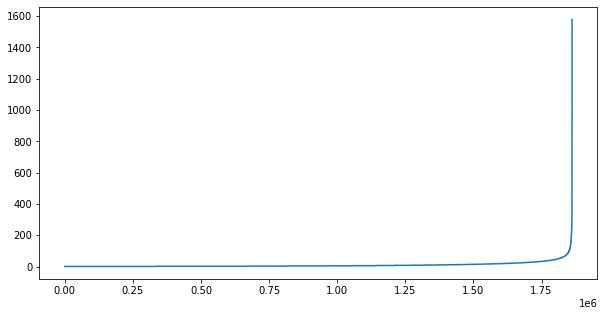

In [0]:
#Following & Followers
#Adding in_degree and out_degree
#Adding both dict we will use Counter
from collections import Counter
ff_dict = Counter(dict(f.in_degree)) + Counter(dict(f.out_degree))
in_out = list(ff_dict.values())
in_out.sort()
plt.figure(figsize=(10,5))
plt.plot(in_out)
plt.show()

In [0]:
#Percentile outlier of In_Out_degree(90-100)
for i in range(0,11):
  print((90+i), 'Value of percentile is', np.percentile(in_out,90+i))

print('='*35)
print('*'*35)
print('='*35)

#Percentile outlier of Indegree(99-100)
for i in range(10,110,10):
  print(99+(i/100), 'Value of percentile is', np.percentile(in_out,99+(i/100)))

90 Value of percentile is 24.0
91 Value of percentile is 26.0
92 Value of percentile is 28.0
93 Value of percentile is 31.0
94 Value of percentile is 33.0
95 Value of percentile is 37.0
96 Value of percentile is 41.0
97 Value of percentile is 48.0
98 Value of percentile is 58.0
99 Value of percentile is 79.0
100 Value of percentile is 1579.0
***********************************
99.1 Value of percentile is 83.0
99.2 Value of percentile is 87.0
99.3 Value of percentile is 93.0
99.4 Value of percentile is 99.0
99.5 Value of percentile is 108.0
99.6 Value of percentile is 120.0
99.7 Value of percentile is 138.0
99.8 Value of percentile is 168.0
99.9 Value of percentile is 221.0
100.0 Value of percentile is 1579.0


**Observations:**
* Most values lie in the range of 80–100.
* Maximum is 1579

**Stats of Followers and Following**

In [0]:
print('Number of Person not following Anyone are:', sum(np.array(following1)==0 ),
      'and % is', sum(np.array(following1)==0 )*100/len(following1)) #out_degree = 0

Number of Person not following Anyone are: 274512 and % is 14.741115442858524


In [0]:
print('Number of Person with No followers are:', sum(np.array(followers1)==0),
      'and % is', sum(np.array(followers1)==0)*100/len(followers1)) #in_degree = 0

Number of Person with No followers are: 188043 and % is 10.097786512871734


In [0]:
print('Number of Person with less than 10 followers and following:', sum(np.array(in_out)<10),
      'and % is', sum(np.array(in_out)<10)*100/len(in_out))

Number of Person with less than 10 followers and following: 1320326 and % is 70.90064546616404


14% of the users in our data are not following anyone and 10% of users have 0 followers.



---

---



---



---





## Generating Missing Edges
Let's generate those 9437519 missing edges we infered above.

In [0]:
import csv
import random
import pickle

As we are using Google Colaboratorry, We wont run this code as this will take all our google colab ram, instead we will download the train_noheader.csv and run this code in new notebook and download the missing_edges_final.p pickle file and upload it to colab files to ease our work and it wont exhaust our ram.

In [0]:
r = csv.reader(open('train_noheader.csv','r'))
#Creating a dictionary with 2 tuple nodes as keys and values 1 and -1
#Value 1 for all the connected nodes and -1 for missing 

edges = dict()

#for all the connected nodes
for edge in r:
  edges[(edge[0],edge[1])] = 1

#for all the missing nodes
missing_edges = set([])
while(len(missing_edges)<9437519):
       a=random.randint(1,1862220)
       b=random.randint(1,1862220)
       temp = edges.get((a,b),-1)
       if temp == -1 and a!=b:
         try:
           #adding nodes less likely to be friends
           if nx.shortest_path_length(f, source=a,target=b)>2: #greater than 2 becaus more distance less probablity of being friend
             missing_edges.add((a,b))
           else:
             continue
         except:
            missing_edges.add((a,b))
       else:
         continue

import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))

Creating dictionary in which pair of nodes will be the key and the value will be '1' for the existing link and '-1' for the missing link.

Then Using while loop to selelct exactly 9437519 number of missing values and adding them to a set named 'missing_edges'.

After while loop, lets talk about if statement. We check for the edge between two randomly selected nodes from the data is present in the dictionary we created and check for the randomly chosen nodes are not the same because a node cannot be linked with itslef.

Now we check for the shortest path between two nodes is greater than 2 and if yes then we add them to our missing set. And we do this to make our model learn better. 

Since it takes alot of time to do all this we will pickle missing_edges to recall it quickly.

In [0]:
file = open("missing_edges_final.p","rb")

In [0]:
missing_edges = pickle.load(file)

In [0]:
len(missing_edges)

9437519

#Splitting Train and Test 

Saving the two list as positive and negative data point and splitting train and test

In [0]:
pos_df = pd.read_csv('train.csv')
neg_df = pd.DataFrame(list(missing_edges), columns=['source_node','destination_node'])

print('Number of nodes in the graph with edges', pos_df.shape[0])
print('Number of nodes in the graph without edges', neg_df.shape[0])

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519


Now we will change our dataset into binary classification problem by changing missing and present links into 0 and 1 to make it easier to classify.

In [0]:
x_train_pos, x_test_pos, y_train_pos, y_test_pos  = train_test_split(pos_df,np.ones(len(pos_df)),test_size=0.2, random_state=9)
x_train_neg, x_test_neg, y_train_neg, y_test_neg  = train_test_split(neg_df,np.zeros(len(neg_df)),test_size=0.2, random_state=9)

print("Number of nodes in the train data graph with edges", x_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", x_train_neg.shape[0],"=", y_train_neg.shape[0])

print('='*60)

print("Number of nodes in the test data graph with edges", x_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", x_test_neg.shape[0],"=",y_test_neg.shape[0])

Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [0]:
#removing header and saving
x_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
x_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
x_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
x_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)

In [0]:
x_train_pos.head()

,source_node,destination_node
1391430,273084,1505602
4629886,912810,1678443
1861427,365429,1523458
2677448,527014,1605979
6220735,1228116,471233


In [0]:
x_test_pos.head()

,source_node,destination_node
4303730,848424,784690
6328118,1248963,444518
1347397,264224,132395
2788658,549680,326829
4439018,875380,1394902


In [0]:
y_train_pos

array([1., 1., 1., ..., 1., 1., 1.])

In [0]:
y_test_pos

array([1., 1., 1., ..., 1., 1., 1.])

As final data has been prepared and saved in four csv, we will visualise the final data using netwrorkX library and highlight some of its characterstics.

In [0]:
del missing_edges

In [0]:
import os

In [0]:
if (os.path.isfile('train_pos_after_eda.csv')) and (os.path.isfile('test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trainYes_testYes = len(train_nodes_pos.intersection(test_nodes_pos))
    trainYes_testNo = len(train_nodes_pos - test_nodes_pos)
    testYes_trainNo = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trainYes_testYes)
    print('no of people present in train but not present in test -- ',trainYes_testNo)

    print('no of people present in test but not present in train -- ',testYes_trainNo)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(testYes_trainNo/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


Approx 81000 people are present in the test set but are not in the train set, this might be a slight problem. So we will concatenate the positive and negative edges together and save the final train and test data. 

#Final Train & Test Datasets

In [0]:
if (not os.path.isfile('train_after_eda.csv')) and \
(not os.path.isfile('test_after_eda.csv')) and \
(not os.path.isfile('train_y.csv')) and \
(not os.path.isfile('test_y.csv')) and \
(os.path.isfile('train_pos_after_eda.csv')) and \
(os.path.isfile('test_pos_after_eda.csv')) and \
(os.path.isfile('train_neg_after_eda.csv')) and \
(os.path.isfile('test_neg_after_eda.csv')):
   
   x_train_pos = pd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
   x_test_pos = pd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
   x_train_neg = pd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
   x_test_neg = pd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])

   print('='*60)
   print("Number of nodes in the train data graph with edges", x_train_pos.shape[0])
   print("Number of nodes in the train data graph without edges", x_train_neg.shape[0])
   print('='*60)
   print("Number of nodes in the test data graph with edges", x_test_pos.shape[0])
   print("Number of nodes in the test data graph without edges", x_test_neg.shape[0])

   x_train = x_train_pos.append(x_train_neg,ignore_index=True)
   y_train = np.concatenate((y_train_pos,y_train_neg))
   x_test = x_test_pos.append(x_test_neg,ignore_index=True)
   y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
   x_train.to_csv('train_after_eda.csv',header=False,index=False)
   x_test.to_csv('test_after_eda.csv',header=False,index=False)
   pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
   pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [0]:
print("Data points in train data",x_train.shape)
print("Data points in test data",x_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


After concatenating the both negative and positive edges and creating final csv of both train and test, we will generate some features for our data to help train our model better.